In [1]:
#import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from pandas_ml import ConfusionMatrix
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import re


In [2]:
#train data set
df = pd.read_csv(os.getcwd()+'/data/train_lyrics_1000.csv')
df.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [3]:
#test data set
df_test = pd.read_csv(os.getcwd()+'/data/valid_lyrics_200.csv')
df_test.head()

,file,artist,title,genre,lyrics,mood
0,TRAFAIB128F426E636.h5,Placebo,Where Is My Mind (XFM Live Version),Pop,Ooooohh\nOoooohh\nOoooohh\nOoooohh\n\nWith you...,happy
1,TRAFAJC128E078888B.h5,Queens Of The Stone Age,This Lullaby,Rock,"Where, oh, where have you been, my love?\nWher...",sad
2,TRAFBBP128F92F6CC9.h5,MC5,Looking At You (Cody High School),Rock,When it happened \nsomething snapped inside \n...,happy
3,TRAFBVU128F426B3F6.h5,Dimmu Borgir,The Fundamental Alienation,Rock,My eyes got blinded\nAnd conned by the light\n...,sad
4,TRAFEEO12903CFEC87.h5,Dark Fortress,The Silver Gate,Rock,"[Music: V Santura, Lyrics: Morean]\n\nAwake, a...",sad


In [4]:
#train dataset label encoding
mood = df['mood']

le = LabelEncoder()
le.fit(mood)
mood = le.transform(mood)

X_train = df['lyrics']
Y_train = mood

#Test dataset label encoding
X_test = df_test['lyrics']
Y_test = df_test['mood']
le.fit(Y_test)
Y_test = le.transform(Y_test)


In [5]:
porter_stemmer = nltk.stem.porter.PorterStemmer()

#spilts the sentences into words
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

stop_words = set(stopwords.words('english')) 

#tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   lowercase = True,
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   min_df = 2,
                                   binary=False)

#vectorized data
x_train = vectorizer.fit_transform(X_train)

x_test = vectorizer.transform(X_test)

# Feature selection
# Select top 'k' of the vectorized features.
selector = SelectKBest(f_classif, k=min(25000, x_train.shape[1]))
selector.fit(x_train, Y_train)

x_train = selector.transform(x_train).astype('float32')

x_test = selector.transform(x_test).astype('float32')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop

In [6]:
#model implementation
lgr = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr')

lgr.fit(x_train, Y_train)

pred = lgr.predict(x_test)

In [7]:
#Actual vs prediction

#Take the two values for comparison as actual and predicted
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred})

# pred_df.head(50)

#print the values
pred_df.head(20)

,Actual,Predicted
0,0,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,1
7,1,1
8,0,1
9,0,1


In [8]:
#Model Evaluation

def evaluation(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    #Calculating precision
    def Precision_Cal(TP,FP):
        return TP/(TP+FP)

    #Calculating recall
    def Recall_Cal(TP,FN):
        return TP/(TP+FN)

    #Calculating F1 score
    def F1_Cal(precision,recall):
        f1 = 2*((precision * recall)/(precision+recall))
        print('F1 Score = ', f1)
        #print('F1 % = ', f1*100)

    #Calculating Error Rate
    def Err_Cal(TP,FP,FN,TN):
        return ((FP+FN)/(TP+FP+FN+TN))

    precision = Precision_Cal(TP,FP)
    print('Precision = ', precision)

    recall = Recall_Cal(TP,FN)
    print('Recall = ', recall)

    F1_Cal(precision,recall)

    Err_Rate = Err_Cal(TP,FP,FN,TN)
    print('Error Rate = ', Err_Rate)

    #Accuracy is 1-error rate
    print('Accuracy = ', 1-Err_Rate)
    
def rocCurve(y_true, y_pred, roc):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
def plotConfusionMatrix(cm):
    np.set_printoptions(suppress=True)
    mp.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
                cbar=False,
                annot=True, 
                square=True,
                fmt='d',
                yticklabels=['happy','sad'],
                xticklabels=['happy','sad'],
                cmap='Blues'
                )
    plt.title('Confusion matrix - Validation dataset')
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig('confmat_valid.eps', dpi=300)
    plt.show()

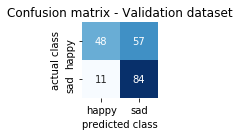

Precision =  0.45714285714285713
Recall =  0.8135593220338984
F1 Score =  0.5853658536585367
Error Rate =  0.34
Accuracy =  0.6599999999999999
ROC-AUC 0.6706766917293233


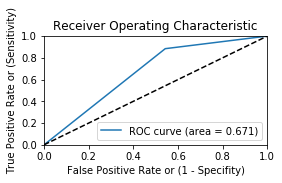

In [9]:
roc_auc = roc_auc_score(Y_test, pred, average= 'micro')

#confusion matrix for count vector
cm = metrics.confusion_matrix(Y_test, pred, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cm)

rocCurve(Y_test, pred, roc_auc)

#Evaluation
evaluation(cm)
print("ROC-AUC", roc_auc)
